# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing  # Updated dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target


In [3]:
# Data Preprocessing (Normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
# Custom Linear Regression Implementation
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X @ self.coefficients


In [6]:
# Train and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))

Linear Regression RMSE: 0.7455813830127763
Linear Regression R²: 0.575787706032451


In [7]:
# Train and evaluate Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest RMSE: 0.5054678690929896
Random Forest R²: 0.805024407701793


In [8]:
# Train and evaluate XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost RMSE: 0.4717943691423984
XGBoost R²: 0.8301370561019205


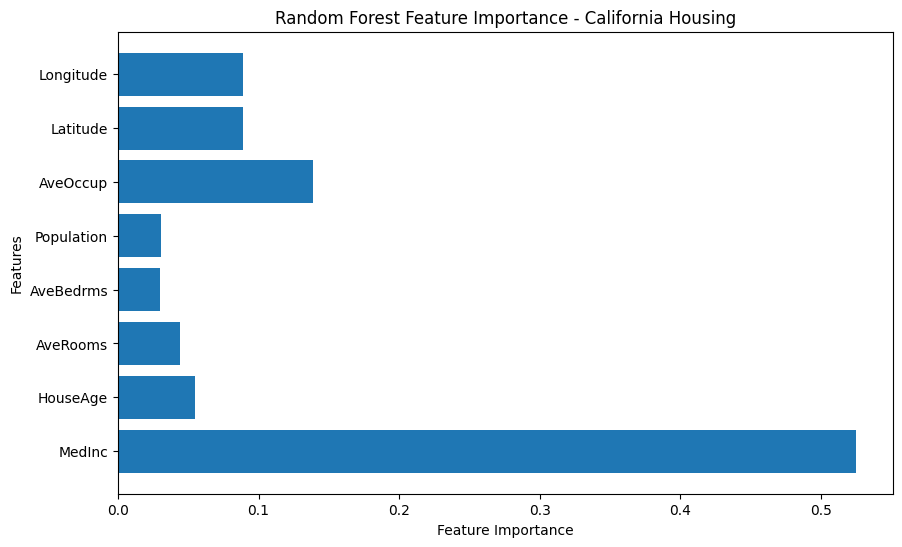

In [10]:
# Feature Importance Visualization
plt.figure(figsize=(10, 6))
plt.barh(california.feature_names, rf.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance - California Housing")
plt.show()

In [15]:
import joblib

# Save the models
joblib.dump(lr, 'linear_regression_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(xgb_model, 'xgboost_model.pkl')

print("Models saved successfully!")

Models saved successfully!
